<a href="https://colab.research.google.com/github/samvardhan777/yolo-table-extraction/blob/main/Yolo_table_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralyticsplus==0.0.28 ultralytics==8.0.43

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=d2bfd757b6c5be2d2bf75225be5f3e11e708116a8dab1d9849db0710e6e2c403
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [2]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('foduucom/table-detection-and-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = '/content/26.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()


config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


tensor([[4.70000e+01, 2.25000e+02, 7.19000e+02, 8.45000e+02, 7.93856e-01, 0.00000e+00]])


In [6]:
results[0].boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([1, 6])
dtype: torch.float32
 + tensor([[4.70000e+01, 2.25000e+02, 7.19000e+02, 8.45000e+02, 7.93856e-01, 0.00000e+00]])

In [9]:
!pip install pytesseract pandas opencv-python

Starting debug process...
1. Reading image...


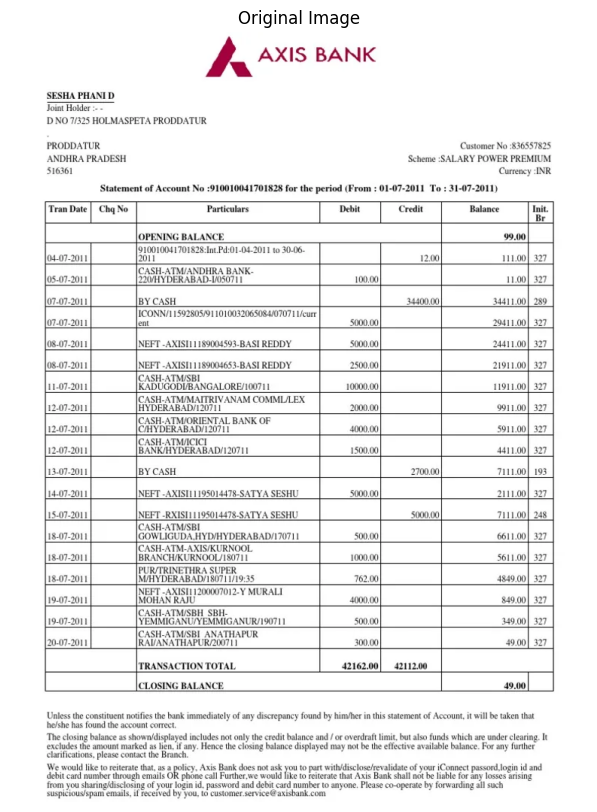


2. Detecting table...

image 1/1 /content/26.jpg: 640x480 1 bordered, 13.0ms
Speed: 3.2ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Table coordinates: (47, 224) to (719, 844)


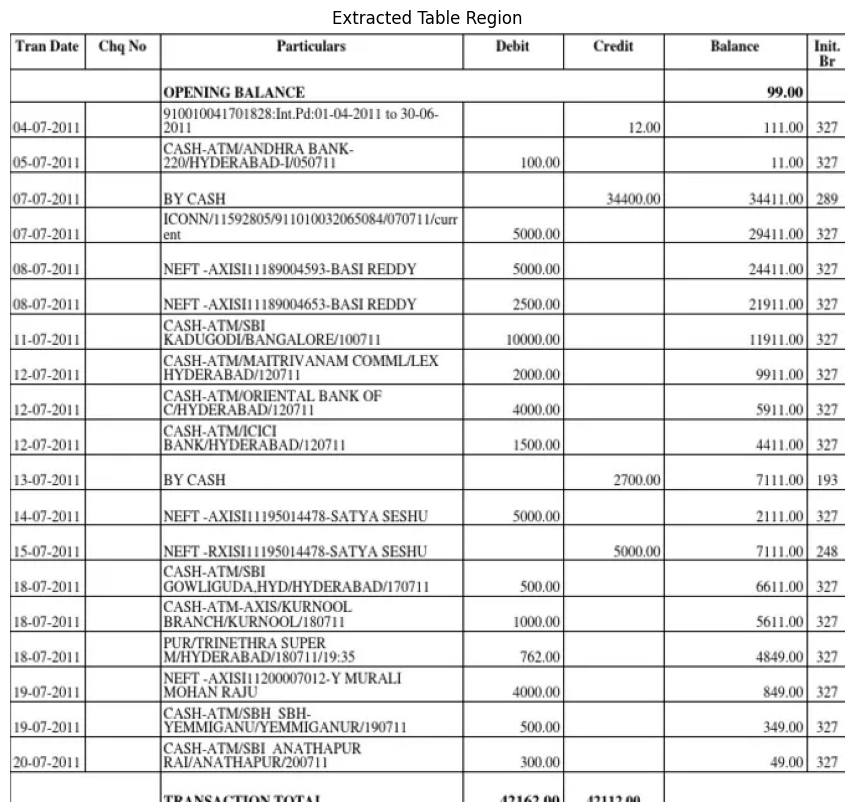


3. Converting to grayscale...


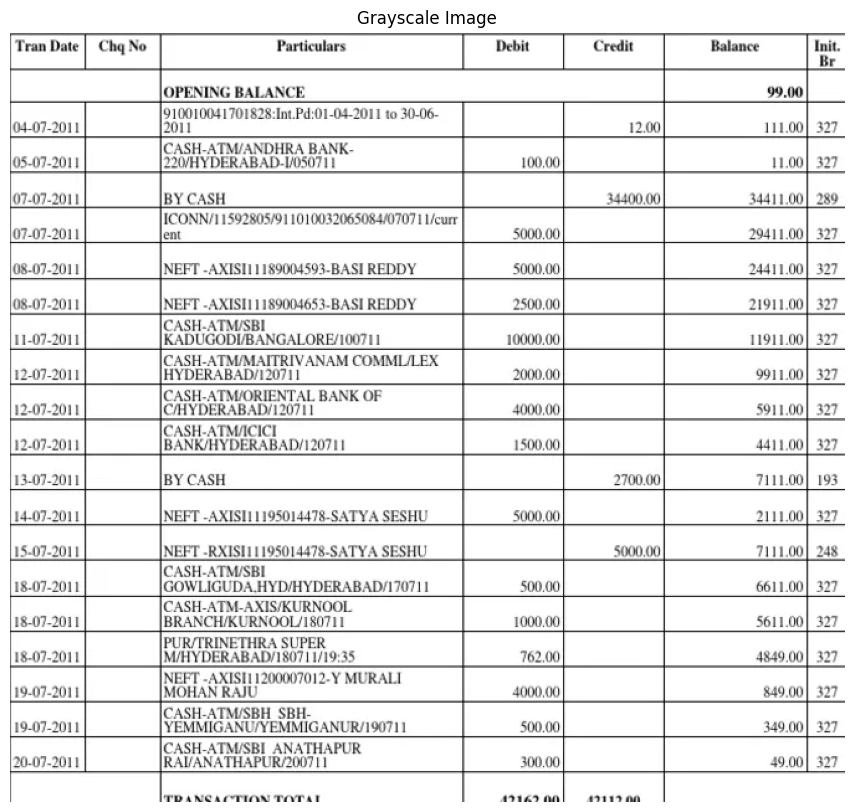


4. Enhancing contrast...


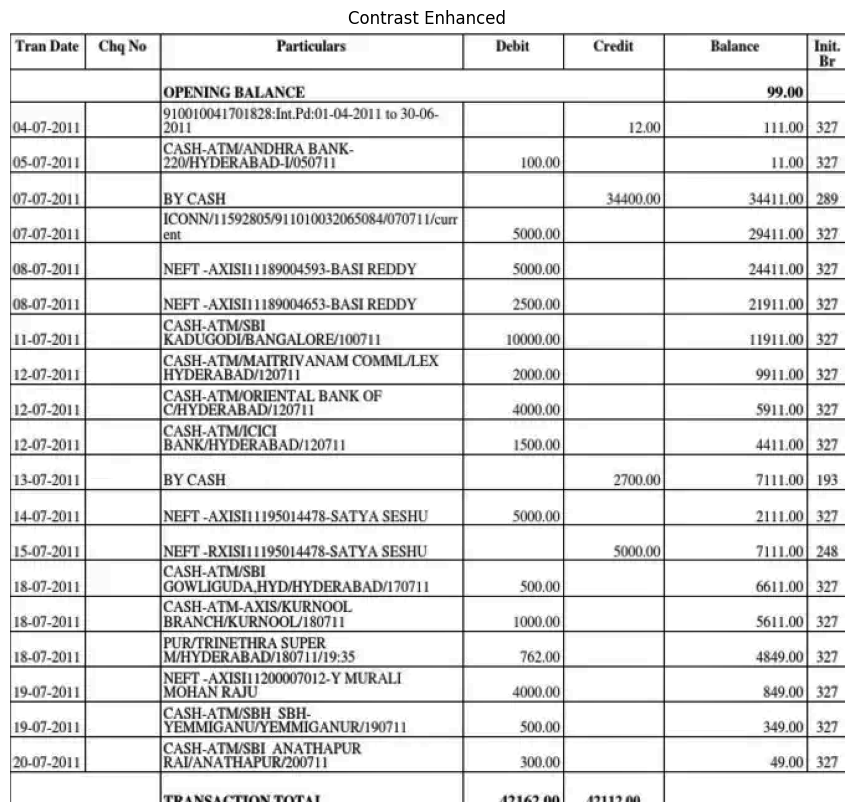


5. Applying threshold...


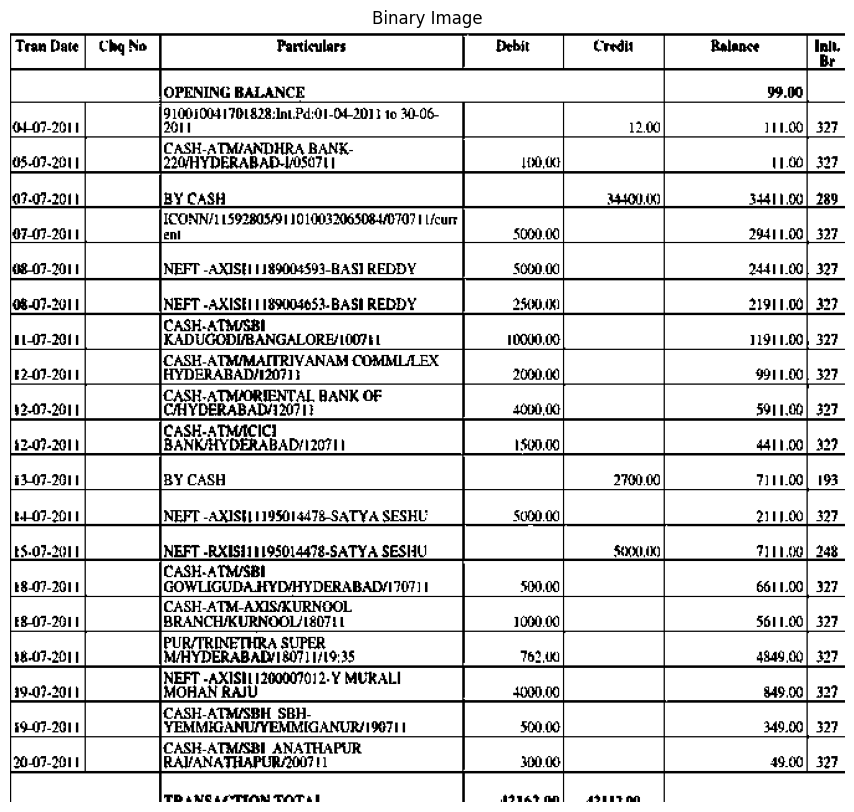


6. Attempting OCR with different configurations...

Trying Default configuration:
--------------------------------------------------
 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

[Tran Date] hq No Particulars: Debit Credit Balance an.
JOPENING BALANCE 99.00]
9100 5001701828:In1.P4:01-04-201¥ 10 30.06-

64.07.2011 pon 1200) 11.00] 327
CASH ATMUANDERA BANK.

05-07-2011 220 YDERABAD-VOSO7UL 100.00 00] 327

07-07-2011 IBY CASH 341000 34411 00] 289
CONN: 1592805/011010032065084/07071 cure

07-07-2011 emt 5000.00 2411.00] 327

08.07.2011 EFT -AXISt11189004593-BAS] REDDY $000.00 2441100) 397

08.07.2011 INEFT -AXISH1189004053-BASI REDDY 2500.0 2191100] 337
CASH. ATSUSBI

11-97-2011 IKADUGODIBANGALORE/OO7A1 10000 0] 11911.00| 327
ICASH. ATAUMAITRIVANAM COMMLILEX

r2.09.2011 YDERABAD/20711 2000.00 9911.00) 397
ICASH-ATMUORIENTAL BANK OF

82.07.2011 CHYEERABADL 20715 000.06] 5911.0] 397
ICASH-ATMACICI

12-07-2011 SANRAVORRABAD 20711 1500.00 4411.00| 329

13.07.2011 BY CASH 2

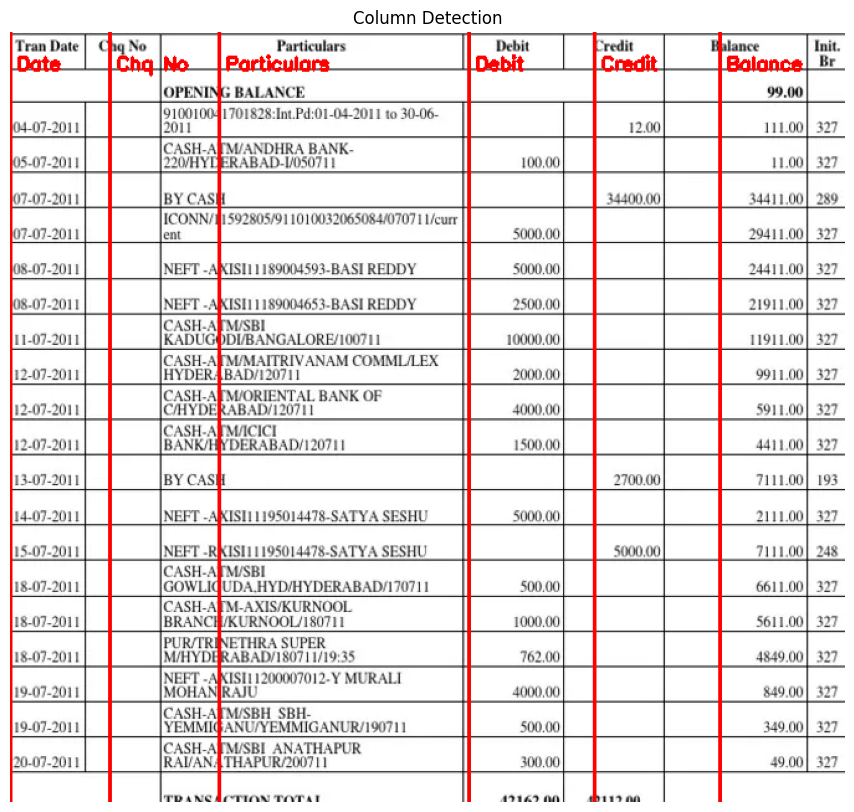


8. Processing individual columns...

Processing Date column:
Extracted text from Date:
------------------------------
 

Team Date

 

 

 

07-2011

 

05.07.2001

 

07.07.2011

 

07-07-2011

 

08-07-2011

 

08.07.2011

 

11-07-2011

 

r2.07-2011

 

42.07.2011

 

:2.07.2011

 

13-07-2011

 

b407-2011

 

5.07.01

 

18.07-2011

 

807-2011

 

18.07.2011

 

19.07.2011

 

59-07-2011

 

90.07.2011

 

 

 

------------------------------


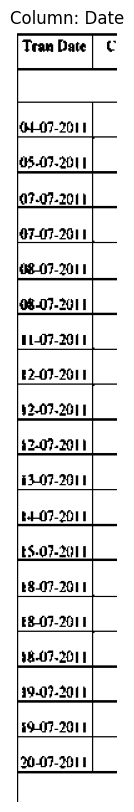


Processing Chq No column:
Extracted text from Chq No:
------------------------------
 

Casta
20D

ay Cas

 

 

------------------------------


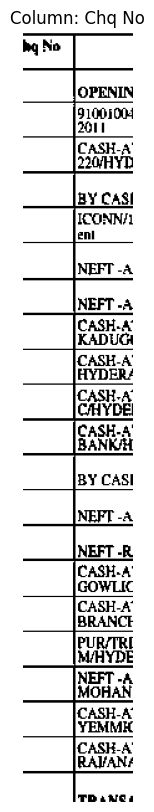


Processing Particulars column:
Extracted text from Particulars:
------------------------------
 

Particulars

 

 

BALANCE
1 7O1828:In1 Pd:01-0F-2011 10 30-06-

 

 

IW/ANDHRA RANK-
BRABAD-VOSO7U

 

j_._.___|
1592805/911010032065084/0707 cur:

 

 

XISHI1189004593-BASI REDDY

 

KISHI 1199004653.BASI REDDY

 

TSB
WDIBANGALORE/100761

   

TMORIENTAL BANK OF
RABAD/I20715

 

TMACICY
YDERABAD/120711

 

   

XISE1 1195014478. SATVA SESHU

 

X1SH11195014478-SATYA SESHU
TMSBI

DA HYD/HYDERABAD/170711
TM-AXISKURNOOL
VKURNOOL/80711

   

   

 

NETHRA SUPER
RABADI80711/19:35

XISI1 1200007012-¥ MURALI
RAJU.

 

 

TMSBH SBA
;ANU/VEMMIGANUR/190711

TMISBI ANATHAPUR
(THAPOR/2007 11

 

 

 

 

------------------------------


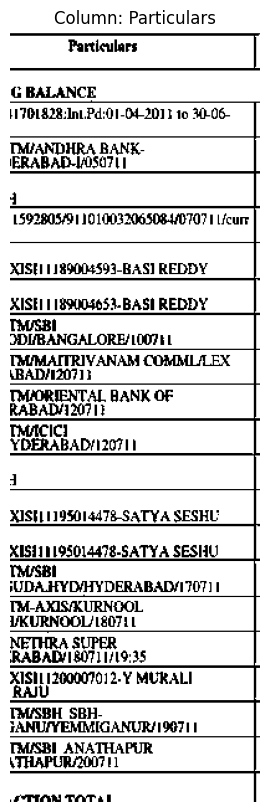


Processing Debit column:
Extracted text from Debit:
------------------------------
100 0a]

5000.00

5000.00

10000.00|
2000.00
4000 0a]
1500.00

500.00

1000.00]

4000.00
500.00|

‘Debit

 

762.00

300.00|

 

------------------------------


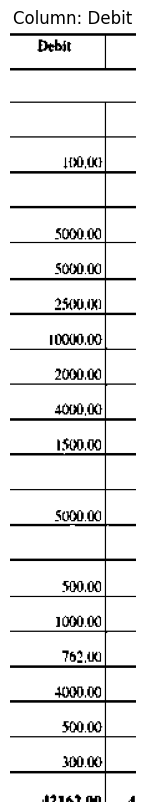


Processing Credit column:
Extracted text from Credit:
------------------------------
 

Credit 2

 

 

2700.00

5000100

 

------------------------------


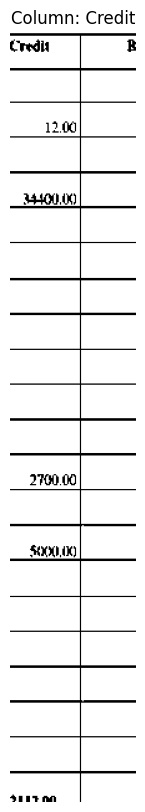


Processing Balance column:
Extracted text from Balance:
------------------------------
 

U.00

99.

 

] tan
{Br
111.00] 327
307
229

34411

 

29411.00| 327

4411.00] 397

21911.00| 397

1191190] 327

9911,00| 327

5911.00] 327

4411.00) 399

TL.

 

 

6611.00] 327

5611.00] 327

4849.00] 397

349.00| 399

 

 

------------------------------


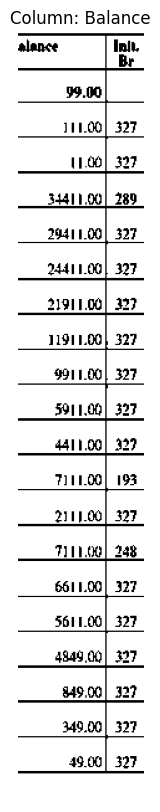

In [14]:
import cv2
import numpy as np
import pytesseract
from ultralyticsplus import YOLO
import matplotlib.pyplot as plt
import pandas as pd

class AxisBankDebugger:
    def __init__(self):
        self.model = YOLO('foduucom/table-detection-and-extraction')

    def show_image(self, image, title=""):
        """Helper function to display images"""
        plt.figure(figsize=(15, 10))
        if len(image.shape) == 2:  # Grayscale
            plt.imshow(image, cmap='gray')
        else:  # Color
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def process_image(self, image_path):
        try:
            # 1. Read and show original image
            print("1. Reading image...")
            image = cv2.imread(image_path)
            if image is None:
                raise ValueError("Could not read image")
            self.show_image(image, "Original Image")

            # 2. Detect table
            print("\n2. Detecting table...")
            results = self.model.predict(image_path)
            if len(results[0].boxes) == 0:
                print("No table detected!")
                return

            # 3. Extract table region
            box = results[0].boxes[0]
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
            print(f"Table coordinates: ({x1}, {y1}) to ({x2}, {y2})")

            table_region = image[y1:y2, x1:x2]
            self.show_image(table_region, "Extracted Table Region")

            # 4. Convert to grayscale
            print("\n3. Converting to grayscale...")
            gray = cv2.cvtColor(table_region, cv2.COLOR_BGR2GRAY)
            self.show_image(gray, "Grayscale Image")

            # 5. Enhance contrast
            print("\n4. Enhancing contrast...")
            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
            contrast = clahe.apply(gray)
            self.show_image(contrast, "Contrast Enhanced")

            # 6. Apply threshold
            print("\n5. Applying threshold...")
            _, binary = cv2.threshold(contrast, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            self.show_image(binary, "Binary Image")

            # 7. Detect text directly for debugging
            print("\n6. Attempting OCR with different configurations...")

            # Try different OCR configurations
            configs = [
                ('Default', ''),
                ('Simple', '--psm 6'),
                ('Table', '--psm 6 --oem 3'),
                ('Single Line', '--psm 7 --oem 3'),
                ('Raw', '-c tessedit_char_whitelist="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz-/., "')
            ]

            for config_name, config in configs:
                print(f"\nTrying {config_name} configuration:")
                text = pytesseract.image_to_string(binary, config=config)
                print("-" * 50)
                print(text)
                print("-" * 50)

            # 8. Try to detect columns
            print("\n7. Detecting columns...")
            width = binary.shape[1]

            # Define column boundaries
            columns = [
                ('Date', 0, int(width * 0.12)),
                ('Chq No', int(width * 0.12), int(width * 0.25)),
                ('Particulars', int(width * 0.25), int(width * 0.55)),
                ('Debit', int(width * 0.55), int(width * 0.70)),
                ('Credit', int(width * 0.70), int(width * 0.85)),
                ('Balance', int(width * 0.85), width)
            ]

            # Show column divisions
            column_viz = table_region.copy()
            for name, x1, x2 in columns:
                cv2.line(column_viz, (x1, 0), (x1, column_viz.shape[0]), (0, 0, 255), 2)
                cv2.putText(column_viz, name, (x1+5, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

            self.show_image(column_viz, "Column Detection")

            # 9. Try to process each column separately
            print("\n8. Processing individual columns...")
            for name, x1, x2 in columns:
                print(f"\nProcessing {name} column:")
                column_image = binary[:, x1:x2]
                text = pytesseract.image_to_string(column_image)
                print(f"Extracted text from {name}:")
                print("-" * 30)
                print(text)
                print("-" * 30)

                # Show the column
                self.show_image(column_image, f"Column: {name}")

        except Exception as e:
            print(f"Error during processing: {str(e)}")
            import traceback
            traceback.print_exc()

def main():
    debugger = AxisBankDebugger()
    image_path = '/content/26.jpg'
    print("Starting debug process...")
    debugger.process_image(image_path)

if __name__ == "__main__":
    main()

In [6]:
!pip install ultralyticsplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=9fc701457bdaacab5e108e5c0b477e49cd134ae98f6ed4e23d4f2c42cd42f6e3
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found 

In [4]:
!pip install pytesseract

In [9]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,024 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [8]:
!tesseract --version

/bin/bash: line 1: tesseract: command not found
